## Hopfield network model

In this simplified Hopfied model, each neuron can only take values +1 or -1. The network stores pixel patterns, and attempts to retrieve them given some cue in the form of a part of the original pattern used to set an initial state $S_i(t=0)$ for every neuron in the network. The network activation of all the neurons evolves as follows

$$S_i(t+1) = sgn\left(\sum_j{w_{ij} S_j(t)}\right), $$

where the weight of every synaptic connection is calculated as,

$$w_{ij} = \frac{1}{N} \sum_{\mu}{p_i^\mu p_j^\mu}, $$

where in turn, $N$ is the number of neurons, and $p_i^\mu$ is the state of the $i^{th}$ neuron for encoding pattern $\mu$.

The code below is taken from this [link](https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html). Follow the accompanying exercises to be better prepared for your assignment. Remember to install all needed libraries before trying to run it. 

## Our own Hopfield network model

You will write your own code to build a Hopfield network. I am leaving sample expected results below as a guide. 

## Assignment 1

Q1. Can you write you own Hopfield network model that works more or less like the one simulated above? (20 points)

Q2. Run the model with different parameters to figure out how the model's capacity to retrieve the correct pattern in response to a cue deteriorates as a function of 
(a) the informativeness of the cue
(b) the number of other patterns stored in the network
(c) the size of the network

Present your answers with plots and/or math. (20 points)

Q3. Can you write a function that converts MNIST digit [data](https://gitlab.com/datapythonista/mnist) to the sort of patterns used in this simulation? (20 points)

Q4. Can you write an MNIST classifier using the Hopfield network?. Can you characterize its performance using F-score, and compare with [classical](https://github.com/ksopyla/svm_mnist_digit_classification) and [deep](https://github.com/hwalsuklee/tensorflow-mnist-cnn) supervised learning methods? Remember that you can always use multiple samples of the same digit even for the Hopfield network classifier. Summarize your sense of the merits and demerits of using a Hopfield network as a classifier (40 points) 

# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from neurodynex3.hopfield_network import network, pattern_tools, plot_tools
from copy import deepcopy
from brian2 import *
#Sets the plots to be displayed and saved in notebook
%matplotlib inline 
plt.rcParams["figure.figsize"] = (12,7)

In [2]:
##Function to generate numpat number of random patterns of size psize x psize 
def get_patterns(psize,numpat):
    patlist =[] ##Empty list to store patterns
    for _ in range(numpat):
        newpat = np.array([[0 for a in range(psize)] for b in range(psize)]) ##Initialize a psize*psize array with 0
        for i in range(psize):
            for j in range(psize):
                newpat[i][j] = 1 if np.random.randint(1,10)<6 else -1 ##Randomly populate array with 1 and -1 with equal probability
        patlist.append(newpat)
    return patlist

##Function to distort or complement nflips number of pixels in passed pattern
def perturb_pattern(pattern,nflips):
    indexes = []
    while(len(indexes)<nflips): ##Generate nflips random pixel coordinates 
        a,b = (np.random.randint(0,len(pattern)),np.random.randint(0,len(pattern)))
        if (a,b) not in indexes:
            indexes.append((a,b))
    for a,b in indexes: ##Flip the random selected pixels
        pattern[a][b] = -1 if pattern[a][b]== 1 else 1
    return pattern

##Function To calculate weights of each neuron with all other neurons of hopsfield network
def calculate_weights(patlist,psize):
    weights = np.array([[0 for i in range (psize*psize)] for j in range (psize*psize)]) ##initialize a s array of size no of neurons * no of neurons with 0
    
    ##Uses the  formula mentioned above to calculate weights 
    for p in patlist:
        for i in range(psize*psize):
            for j in range(psize*psize):
                weights[i][j] += p[i//psize][i%psize]* p[j//psize][j%psize]
    
    weights = weights/(psize*psize)
    return weights

## Function to calculate new network state
def network_evolution(pattern,weights):
    newpat = deepcopy(pattern)
    for i in range(len(weights)):
        sum1 = 0
        for j in range(len(weights)):
            sum1+= (weights[i][j])*newpat[j//len(newpat)][j%len(newpat)]
        newpat[i//len(newpat)][i%len(newpat)] = 1 if sum1>=0 else -1
    return newpat

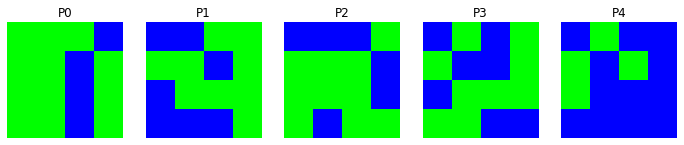

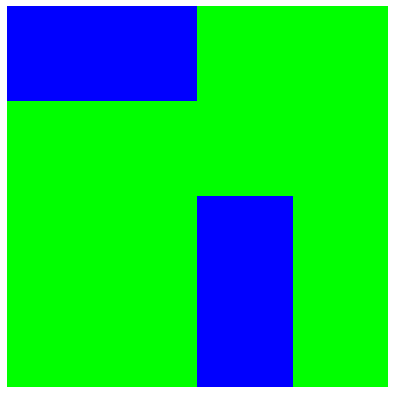

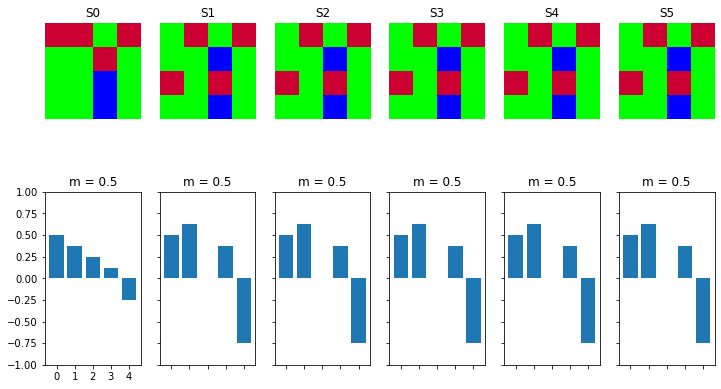

In [3]:
plist = get_patterns(4,5) ##Gets 5 patterns of size 4*4


cue = deepcopy(plist) ##Copies the patternlist to a new memory location

p = perturb_pattern(cue[0],4) ##Change one pattern from original in 4 places  

weights = calculate_weights(plist,4) ##Calculate weights for the network

sequence = [p] ##Add modified pattern to network to sequence list to observe network performance

for i  in range(5): ##Changes network state 5 times to retrieve original pattern from modified pattern
    newpat = network_evolution(sequence[len(sequence)-1],weights)
    sequence.append(newpat)

plot_tools.plot_pattern_list(plist) ##Plots the randomly generated original patterns
plot_tools.plot_pattern(p) ## Plots the modified pattern
plot_tools.plot_state_sequence_and_overlap(sequence,plist,reference_idx=0) ##Plots the sequence in which network evolves to find original pattern

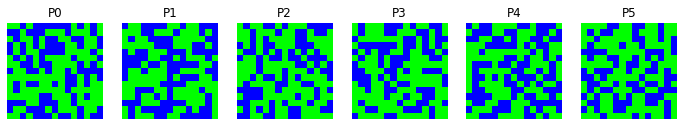

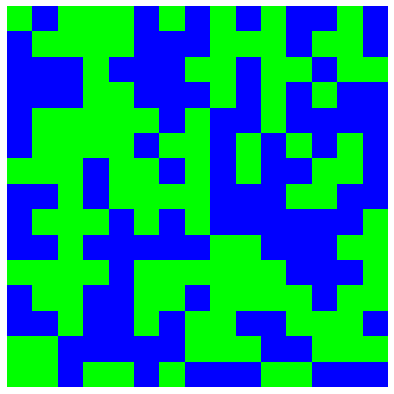

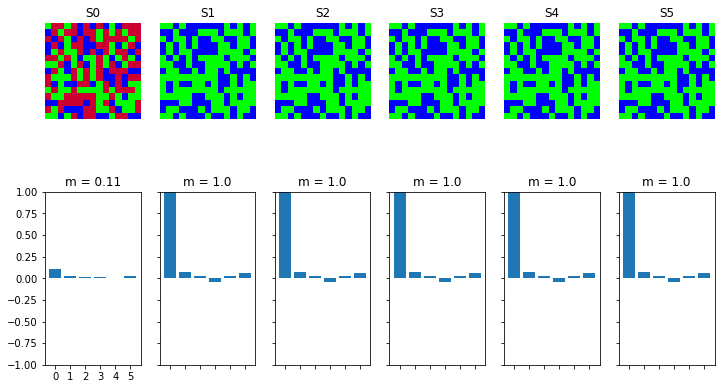

In [4]:
plist = get_patterns(15,6) ##Gets 6 patterns of size 15*15


cue = deepcopy(plist) ##Copies the patternlist to a new memory location

p = perturb_pattern(cue[0],100) ##Change one pattern from original in 4 places  

weights = calculate_weights(plist,15) ##Calculate weights for the network

sequence = [p] ##Add modified pattern to network to sequence list to observe network performance

for i  in range(5): ##Changes network state 5 times to retrieve original pattern from modified pattern
    newpat = network_evolution(sequence[len(sequence)-1],weights)
    sequence.append(newpat)

plot_tools.plot_pattern_list(plist) ##Plots the randomly generated original patterns
plot_tools.plot_pattern(p) ## Plots the modified pattern
plot_tools.plot_state_sequence_and_overlap(sequence,plist,reference_idx=0) ##Plots the sequence in which network evolves to find original pattern

# Professor's Code

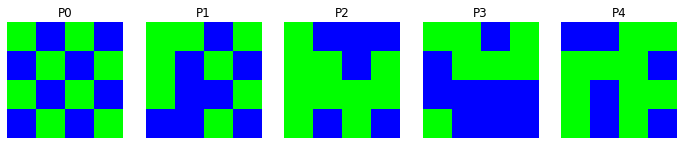

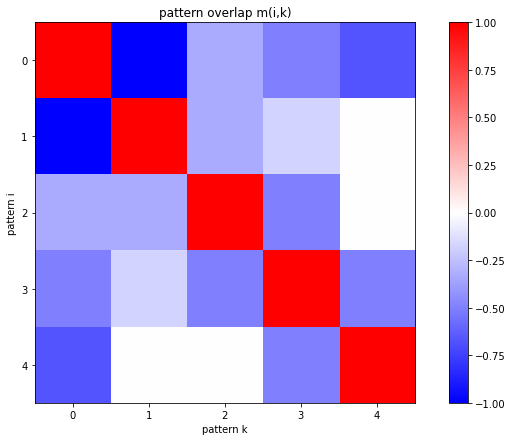

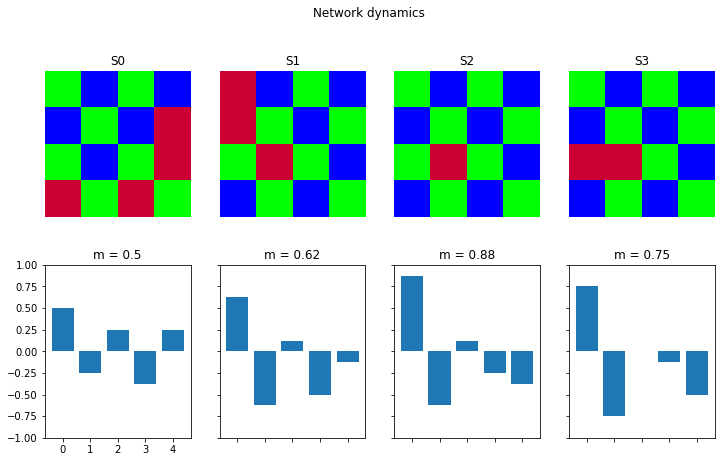

In [5]:

from neurodynex3.hopfield_network import network, pattern_tools, plot_tools

pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=4, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=3)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


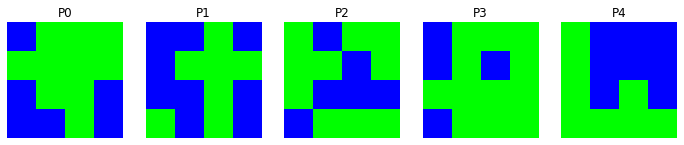

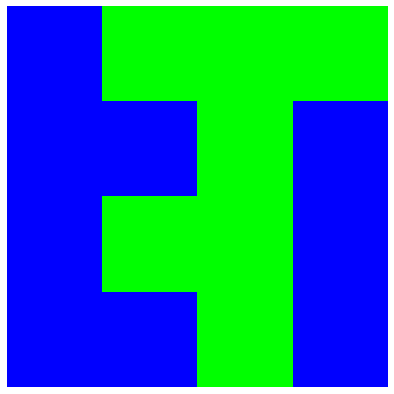

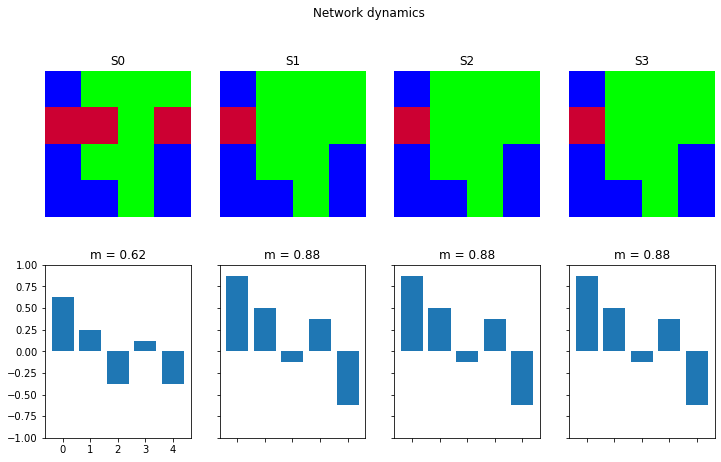

In [6]:
plist = get_patterns(4,5)
#plot_tools.plot_pattern_list(plist)

cue = deepcopy(plist)
S = perturb_pattern(cue[0],3)
wghts = calculate_weights(plist, pattern_size)

state_list =[S]
#state_list.append(S)
#print(state_list)
#plot_tools.plot_pattern(S)
for i in range(3):
    state_list.append(network_evolution(S,wghts))
#    state_list.append(S)

plot_tools.plot_pattern_list(plist)
#print(state_list[0])
plot_tools.plot_pattern(state_list[0])
plot_tools.plot_state_sequence_and_overlap(state_list, plist, reference_idx=0, suptitle="Network dynamics")

# Q2

## (A) Informativeness of Cue

### We will observe effect of increasing no of flips on accuracy of hopsfield network

In [7]:
##Fnuction to calculate result pattern and test pattern are how similar
def accuracy(pattern,result):
    acc = 0.0
    for i in range(len(pattern)):
        for j in range(len(pattern)):
            if pattern[i][j] == result[i][j]:
                acc+=1
    return (acc*1.0)/(len(pattern)**2)

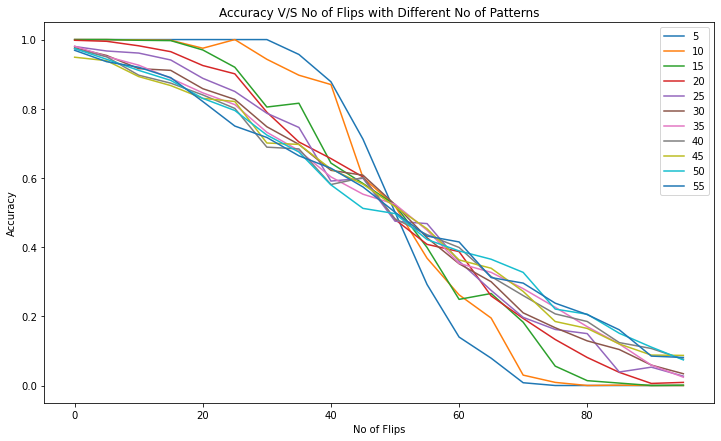

In [8]:
##Varies no of patterns and no of flips for different patterns of size 10 to determine effect of no of flips on network accuracy

acc_npat=[]
for i in range(5,56,5):
    acc=[0]*20
    for j in range(10):
        patlist = get_patterns(10,i)
        weights = calculate_weights(patlist,10)
        for flips in range(0,96,5):
            cue = deepcopy(patlist)
            p = perturb_pattern(cue[0],flips)
            for k  in range(5):
                p = network_evolution(p,weights)
            acc[flips//5]+= accuracy(patlist[0],p)
           
    acc_npat.append([a/10 for a in acc])

##Plots the graph of accuracy vs no of flips for different no  of patterns in network

fig , ax = plt.subplots(1)

for i in range(len(acc_npat)):
    values = np.array([x for x in acc_npat[i]])
    keys = [x*5 for x in range(20)]
    ax.plot(keys,values,label = (i+1)*5)
    
ax.set_xlabel('No of Flips')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy V/S No of Flips with Different No of Patterns')
ax.legend(bbox_to_anchor = (1, 1))
print()

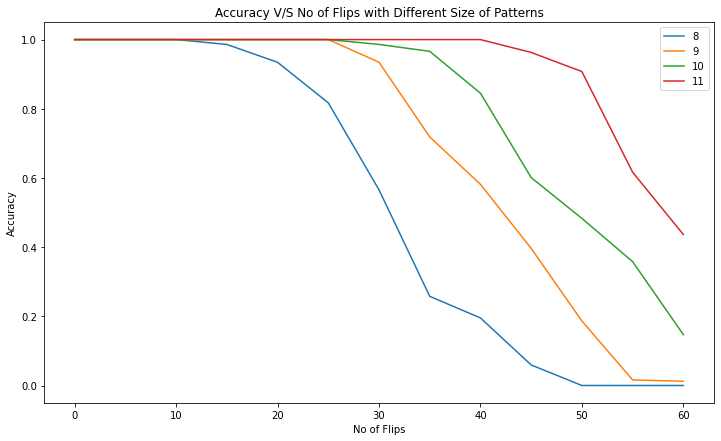

In [9]:
##Varies pattern size and no of flips for different pattern sets of 5 to determine effect of no of flips on network accuracy

acc_sizepat=[]
for i in range(8,12):
    acc=[0]*13
    for j in range(10):
        patlist = get_patterns(i,5)
        weights = calculate_weights(patlist,i)
        for flips in range(0,61,5):
            cue = deepcopy(patlist)
            
            p = perturb_pattern(cue[0],flips)
            for k  in range(5):
                p = network_evolution(p,weights)
            acc[flips//5]+= accuracy(patlist[0],p)
           
    acc_sizepat.append([a/10 for a in acc])

##Plots the graph of accuracy vs no of flips for different pattern sizes

fig , ax = plt.subplots(1)

for i in range(len(acc_sizepat)):
    values = np.array([x for x in acc_sizepat[i]])
    keys = [x*5 for x in range(13)]
    ax.plot(keys,values,label = (i+8))
    
ax.set_xlabel('No of Flips')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy V/S No of Flips with Different Size of Patterns')
ax.legend(bbox_to_anchor = (1, 1))
print()

### As can be seen from above two graphs, as no of flips increases which leads to informativeness of cue decreasing leads to drop in network accuracy.

## (B) No of Patterns in Netwoek

### We will observe effect of increasing no of patterns in network on accuracy of hopsfield network

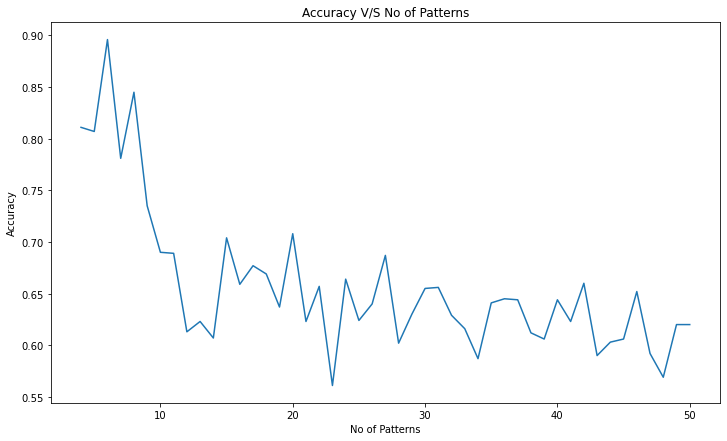

In [10]:
## Varies no of patterns in network with fixed no of flips and pattern size to determine relationship between no of patterns and accuracy
acc=[0]*47
for i in range(4,51):
    for j in range(10):
        patlist = get_patterns(10,i)
        cue = deepcopy(patlist)
        weights = calculate_weights(patlist,10)
        p = perturb_pattern(cue[0],40)
        for k  in range(5):
            p = network_evolution(p,weights)
        acc[(i-4)]+= accuracy(patlist[0],p)
           
acc = [a/10 for a in acc]

##Plots the accuracy vs no of patterns graph using values computed above
fig , ax = plt.subplots(1)

keys = [x for x in range(4,51)]
ax.plot(keys,acc)
    
ax.set_xlabel('No of Patterns')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy V/S No of Patterns')
print()

### As can be seen from above graph, over full range of patterns, increase in no of patterns leads to decrease in accuracy but for partial segments of the graph no discerning trend can be infered.

### For small changes in no of patterns (usually 2-3 ), there is no significant difference in accuracy of network

## (C) Size of Patterns in Netwoek

### We will observe effect of increasing size of patterns in network on accuracy of hopsfield network

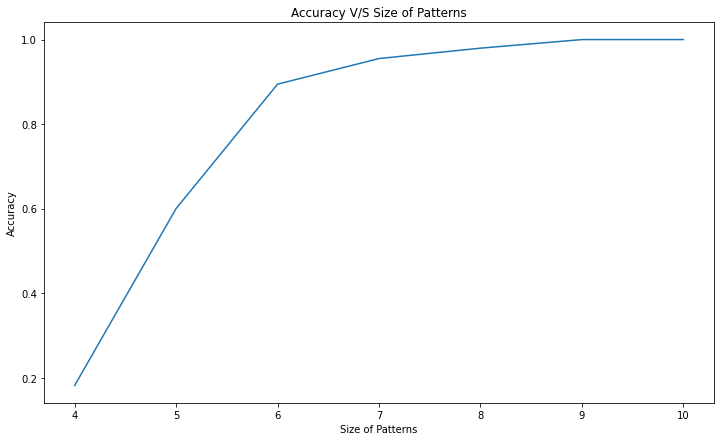

In [11]:
## Varies size of pattern in network with fixed no of flips and no of patterns to determine relationship between size of pattern and accuracy
acc=[0]*7
for i in range(4,11):
    for j in range(10):
        patlist = get_patterns(i,6)
        cue = deepcopy(patlist)
        weights = calculate_weights(patlist,i)
        p = perturb_pattern(cue[0],12)
        for k  in range(5):
            p = network_evolution(p,weights)
        acc[(i-4)]+= accuracy(patlist[0],p)
           
acc = [a/10 for a in acc]

##Plots the accuracy vs no of patterns graph using values computed above
fig , ax = plt.subplots(1)

keys = [x for x in range(4,11)]
ax.plot(keys,acc)
    
ax.set_xlabel('Size of Patterns')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy V/S Size of Patterns')
print()

### It is observed that increase in pattern size leads to increase in network accuracy when constant no of flips are considered but in my opinion it is not right inference as for same no of pixel differences, when size of pattern is small then it has greater effect on accuracy in comparision to when pattern size is greater

# Q3

In [12]:
from tensorflow import keras
import random

(train_X,train_Y),(test_X,test_Y) = keras.datasets.mnist.load_data() ##Loads the MNIST dataset

In [13]:
print(train_X.shape)
print(test_X.shape)

(60000, 28, 28)
(10000, 28, 28)


# Below Code for Deskewing is taken from [Source](https://fsix.github.io/mnist/Deskewing.html)

In [14]:
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]] # A trick in numPy to create a mesh grid
    totalImage = np.sum(image) #sum of pixels
    m0 = np.sum(c0*image)/totalImage #mu_x
    m1 = np.sum(c1*image)/totalImage #mu_y
    m00 = np.sum((c0-m0)**2*image)/totalImage #var(x)
    m11 = np.sum((c1-m1)**2*image)/totalImage #var(y)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/totalImage #covariance(x,y)
    mu_vector = np.array([m0,m1]) # Notice that these are \mu_x, \mu_y respectively
    covariance_matrix = np.array([[m00,m01],[m01,m11]]) # Do you see a similarity between the covariance matrix
    return mu_vector, covariance_matrix

def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)


In [15]:
##Picks randomly n images of each digit from 0 to 9 converts into a binary image with pixel values +1/-1

def datagen():
    xtrain = []
    ytrain = []
    for i in range(10):
        index= [x for x in range(60000) if train_Y[x]== i] ##Finds out indexes of all images of a particular digit i
        randindex = random.sample(index,1) ##samples n indexes without replacement
        for j in randindex: ##Converts selected training images to a binary image 
            data = deskew(train_X[j])[7:21,7:21].flatten() ##Corrects the digit angle then crops it to 14*14 and then flattens it for processing
            data = np.where(data>127,1,-1) ##Replaces pixel with values greater than 127 with 1 and less than or equal to 127 to -1
            data = np.reshape(data,(-1,14)) ##Reshapes the 1D array to 14*14 matrix
            xtrain.append(data)
            ytrain.append(i) ##Stores the training image and its corresponding label
    return xtrain,ytrain

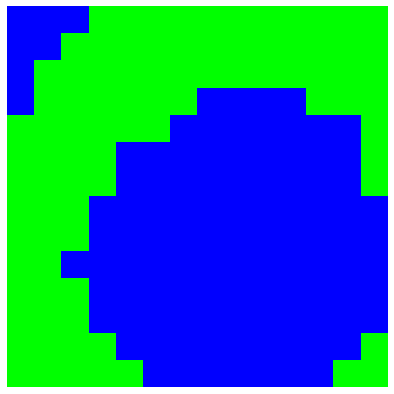

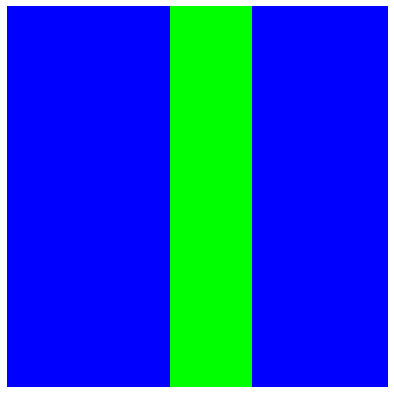

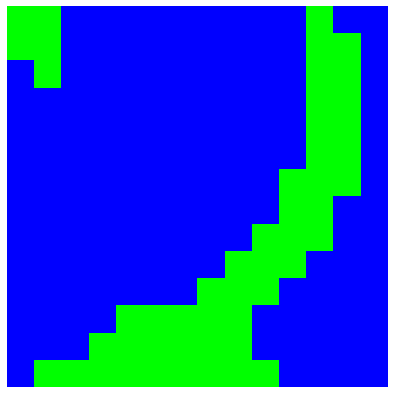

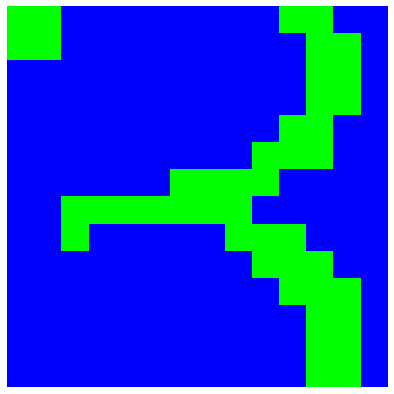

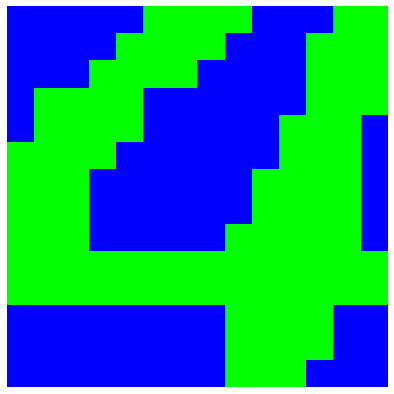

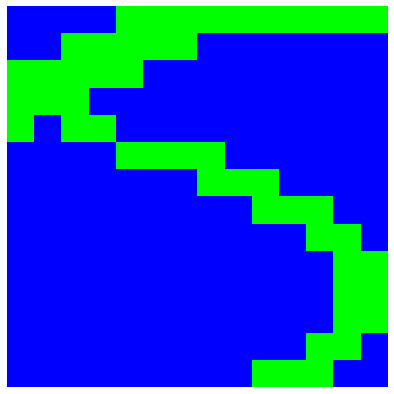

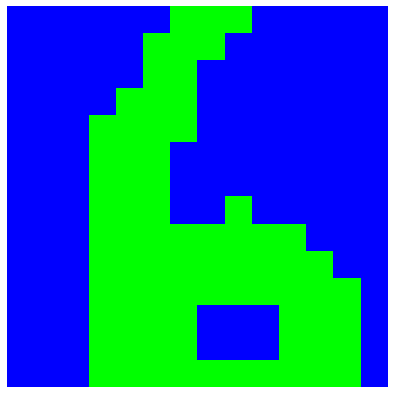

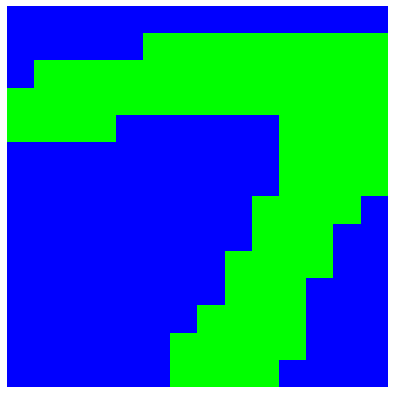

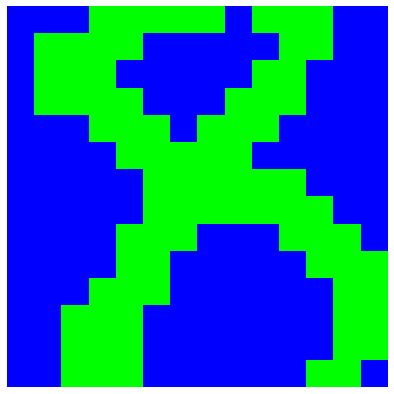

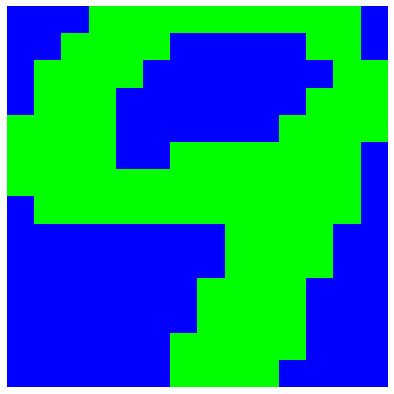

In [16]:
xtrain,ytrain=datagen()
for i in range(10):
    plot_tools.plot_pattern(xtrain[i])

In [17]:
##Same work as 2 cells above but prepares test set
xtest = []
ytest = []
for j in range(10000):
    data = deskew(test_X[j])[7:21,7:21].flatten()
    data = np.where(data>127,1,-1)
    data = np.reshape(data,(-1,14))
    xtest.append(data)
    ytest.append(test_Y[j])


# Q4

In [18]:
def similarity(test,p): ## Calculates how similar two passed patterns are
    dot_prod = np.dot(p.flatten(), test.flatten())

    return float(dot_prod) / (np.prod(p.shape))

In [19]:
##Function which returns label of trainig image which is most similar to passed image in pixel values

def prediction(pattern):
    bestsim = -1
    index = 0
    for i in range(len(xtrain)):
        currsim = similarity(pattern,xtrain[i])
        if currsim>bestsim:
            bestsim = currsim
            pred = ytrain[i]
        
    return pred
        

In [20]:
weights = calculate_weights(xtrain,14) ##Calculates weights for the hopsfield network being built as MNIST classifier

In [21]:
##Runs the test images on the hopfield nework to generate test labels

ypred=[]## Stores the generated labels for each test image
for i in range(len(ytest)):
    p = xtest[i]
    for k in range(1):
        p = network_evolution(p,weights)
    ypred.append(prediction(p))


### Micro parameters take true positive , false negative and false positive for all classes together

### Macro parameter calculates for each class individually and then averages it all to produce single values

In [22]:
##Generates performance metrics of hopfield network like recall , precission and F-score using true and predicted labels for test set

from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')

confmat = confusion_matrix(ytest, ypred) ## No of right and wrong predicted labels for each class

print('Confusion Matrix\n',confmat)


print('\nAccuracy:',np.round(accuracy_score(ytest, ypred),4))

print('\n\nMicro Precision:',np.round(precision_score(ytest, ypred, average='micro'),4))
print('Micro Recall:',np.round(recall_score(ytest, ypred, average='micro'),4))
print('Micro F-score:',np.round(f1_score(ytest, ypred, average='micro'),4))

print('\n\nMacro Precision:',np.round(precision_score(ytest, ypred, average='macro'),4))
print('Macro Recall:',np.round(recall_score(ytest, ypred, average='macro'),4))
print('Macro F-score:',np.round(f1_score(ytest, ypred, average='macro'),4))

print('\n\nWeighted Precision:',np.round(precision_score(ytest, ypred, average='weighted'),4))
print('Weighted Recall:',np.round(recall_score(ytest, ypred, average='weighted'),4))
print('Weighted F-score:',np.round(f1_score(ytest, ypred, average='weighted'),4))

print('\nClassification Report\n\n',classification_report(ytest, ypred))

Confusion Matrix
 [[ 622   19   30   38   67  171   10   12    7    4]
 [   0 1131    1    1    0    0    2    0    0    0]
 [   6  179  453  104   41    6  149    9   81    4]
 [   1  197   62  368    1  241    6    2  131    1]
 [   5  129  275    8  246    6   10  146    0  157]
 [  20  226   66   97    7  401   18   17   32    8]
 [  81  225   71   18  144   27  304   12   65   11]
 [   0  100  541    1    5    1    1  364    0   15]
 [  20  292  153  160   23   73   58   25  153   17]
 [   9   84  316    4  181   10    0  202    1  202]]

Accuracy: 0.4244


Micro Precision: 0.4244
Micro Recall: 0.4244
Micro F-score: 0.4244


Macro Precision: 0.4529
Macro Recall: 0.4163
Macro F-score: 0.4056


Weighted Precision: 0.4517
Weighted Recall: 0.4244
Weighted F-score: 0.4076

Classification Report

               precision    recall  f1-score   support

           0       0.81      0.63      0.71       980
           1       0.44      1.00      0.61      1135
           2       0.23      

## OBSERVATIONS

<ul>
    <li>Recall for digit <b>1</b> is almost 1 so we can infer that true '1' is easy to identify</li>    
    <li>Digit <b>8</b> generally has lowest recall insinuating that there various ways in which people write digit <b>8</b></li>
    <li>F score for digit <b>0</b> and <b>1</b> is generally high meaning classifier has very good performance when it has to classify it and does so with minimum error</li>
    </ul>

## Comparision with deep and classical learning models

### As we can see that F-score for Hopfield Network is in range of 0.25 to 0.42 generally 

### For Classical and Deep learning models the accuracy  is range of 98 to 99.79 % which is much better than aaccuracy of 25 - 40% we are getting for our Hopfield Network.

[Reference Link1](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)
[Reference Link2](https://github.com/hwalsuklee/tensorflow-mnist-cnn)
[Reference Link3](https://github.com/ksopyla/svm_mnist_digit_classification)

## Advantages over other classical and deep learning models

<ol>
    <li>Smaller Training Time</li>
    <li>Simpler to understand and implement</li>
    <li>Not very memory intensive</li>
</ol>

## Disadvantages over other classical and deep learning models

<ol>
    <li>Not very accurate classifier</li>
    <li>No of samples or patterns that can be effectively learnt are limited</li>
    <li>Cannot differentiate between slightly to moderately different patterns</li>
    <li>Limited to only +1/-1, therefore can lead to data loss in cases of shading or colour patterns</li>
</ol>

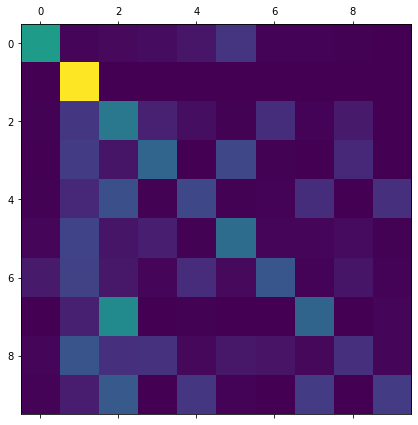

In [23]:
plt.matshow(confmat)

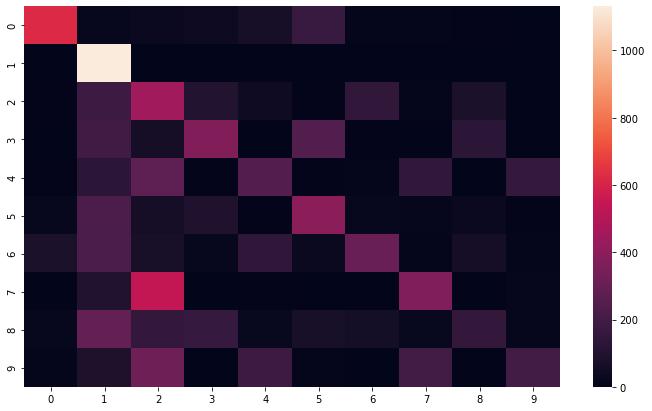

In [24]:
import pandas as pd
import seaborn as sn
df_cm = pd.DataFrame(confmat, range(10), range(10)) 
sn.heatmap(df_cm) 
plt.show()

# References
<ol>
    <li>StackOverflow</li>
    <li><a href='https://iopscience.iop.org/article/10.1088/1757-899X/862/5/052048'>Research Paper</a></li>
    <li><a href='https://fsix.github.io/mnist/Deskewing.html'>Deskewing Code</a></li>
    <li><a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html?highlight=classification%20report#sklearn.metrics.classification_report'>Scikit Performance Metrics</a></li>
    <li><a href='https://www.baeldung.com/cs/multi-class-f1-score'>F score Theory</a></li>
    </ol>